# Engagement Score Prediction

### Importing required libraries

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

### Import the train and test dataset

In [249]:
data_train=pd.read_csv('train_0OECtn8.csv')

In [250]:
data_test=pd.read_csv('test-.csv')

In [251]:
data_train.shape , data_test.shape

((89197, 10), (11121, 9))

We have 89197 rows and 10 columns in our train dataset.

We have 11121 rows and 9 columns in our test dataset.

In [252]:
#Checking for first 5 rows
data_train.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [253]:
# Datatypes present in the train dataset.
data_train.dtypes

row_id                int64
user_id               int64
category_id           int64
video_id              int64
age                   int64
gender               object
profession           object
followers             int64
views                 int64
engagement_score    float64
dtype: object

### Statistical measures of variables

In [254]:
data_train.describe()

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score
count,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000
mean,44599.000000,13881.909806,18.323733,77.715383,24.848616,252.460172,502.980268,3.487797
std,25749.100318,8005.582771,11.675154,48.469656,8.955535,46.094468,268.569482,0.863498
min,1.000000,1.000000,1.000000,1.000000,10.000000,160.000000,30.000000,0.000000
25%,22300.000000,6945.000000,8.000000,34.000000,18.000000,230.000000,229.000000,2.900000
50%,44599.000000,13892.000000,16.000000,76.000000,23.000000,240.000000,467.000000,3.710000
75%,66898.000000,20819.000000,26.000000,120.000000,32.000000,280.000000,714.000000,4.150000
max,89197.000000,27734.000000,47.000000,175.000000,68.000000,360.000000,1000.000000,5.000000


In [255]:
data_test.describe()

,row_id,user_id,category_id,video_id,age,followers,views
count,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000
mean,94758.000000,13825.707400,15.666487,79.742559,24.854150,249.691574,454.959986
std,3210.500506,8001.221954,10.313259,48.702501,8.953976,38.511469,249.759038
min,89198.000000,2.000000,1.000000,1.000000,10.000000,160.000000,44.000000
25%,91978.000000,6881.000000,8.000000,39.000000,18.000000,230.000000,229.000000
50%,94758.000000,13857.000000,12.000000,80.000000,23.000000,240.000000,369.000000
75%,97538.000000,20763.000000,25.000000,121.000000,32.000000,270.000000,662.000000
max,100318.000000,27734.000000,46.000000,174.000000,68.000000,360.000000,990.000000


### checking for missing values

In [256]:
print(data_train.isnull().sum())


row_id              0
user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64


In [257]:
print(data_test.isnull().sum())

row_id         0
user_id        0
category_id    0
video_id       0
age            0
gender         0
profession     0
followers      0
views          0
dtype: int64


There are no null values in our dataset

We have percent of Gender:  Male = 58% , Female 42%

We have percent of professional: Student=50% , Other=30 % , Working Professional=20 % 

The highest percent are students

<AxesSubplot:xlabel='age', ylabel='count'>

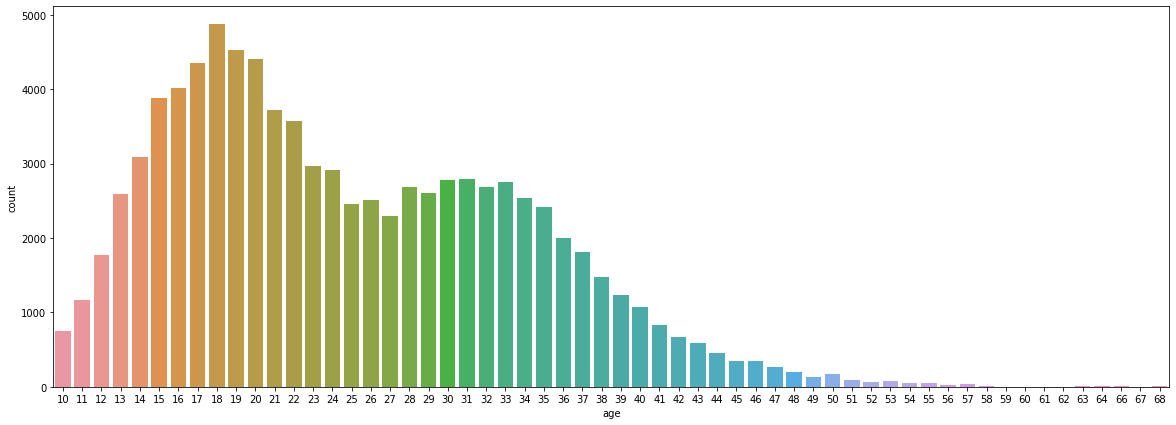

In [258]:
plt.figure(figsize=(20,7))
sns.countplot(data_train['age'])

The highest percent are of age 15-21

<AxesSubplot:xlabel='category_id', ylabel='count'>

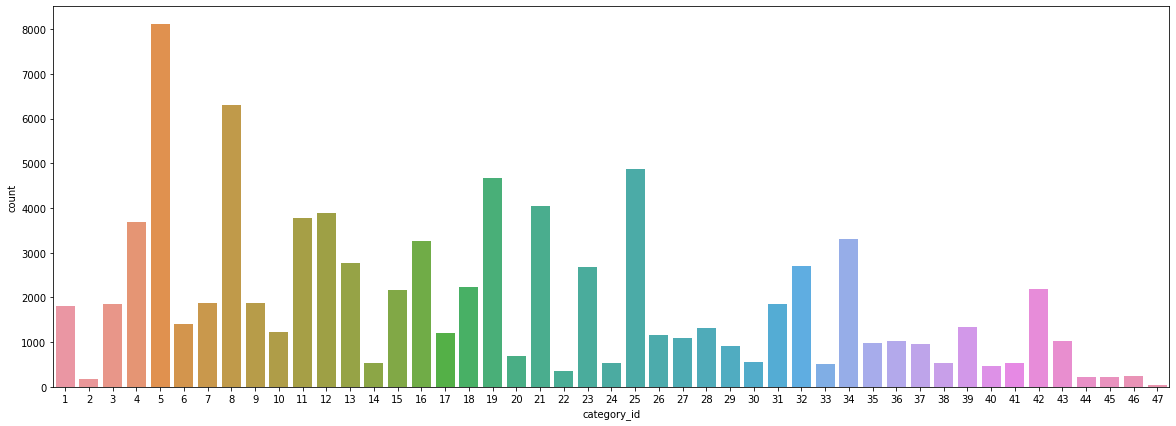

In [259]:
plt.figure(figsize=(20,7))
sns.countplot(data_train['category_id'])

The highest percent category_id is 5

<AxesSubplot:xlabel='age', ylabel='engagement_score'>

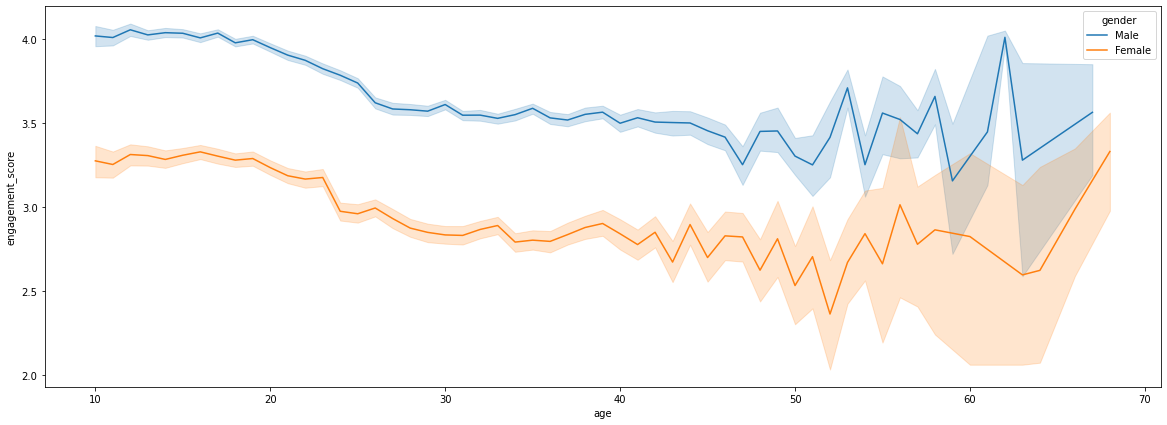

In [260]:
#age with engagement score
plt.figure(figsize=(20,7))
sns.lineplot(data=data_train, x='age', y='engagement_score',hue='gender')

The engagement score is highest among male than female and also highest for 10-20 age category

we can see the plotting of various variables with gender being considered

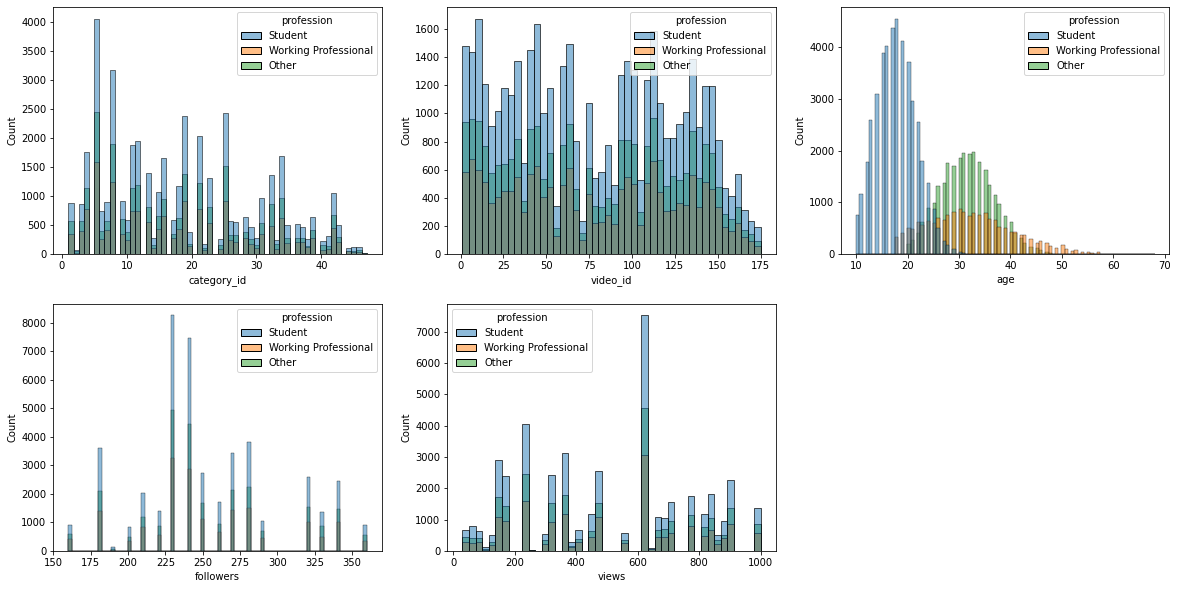

In [261]:
columns=['category_id','video_id', 'age','followers','views']
plt.figure(figsize=(20,10))
for i in range (len(columns)):
    plt.subplot( 2,3,i+1)
    sns.histplot(data=data_train,hue='profession',x=columns[i])

we can see the plotting of various variables with profession being considered

### Checking for outliers

<AxesSubplot:xlabel='category_id'>

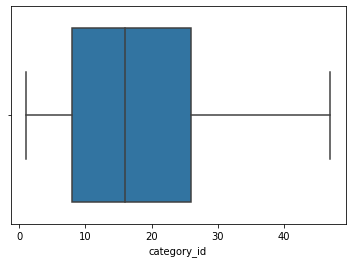

In [262]:
sns.boxplot(data_train['category_id'])

We can see that there are no outliers present.

We can see that there are no outliers present

<AxesSubplot:xlabel='followers'>

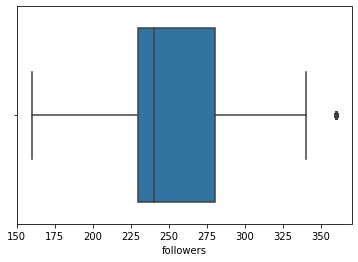

In [263]:
sns.boxplot(data_train['followers'])

We can see that there are no outliers present

We can see that there are no outliers present

<AxesSubplot:>

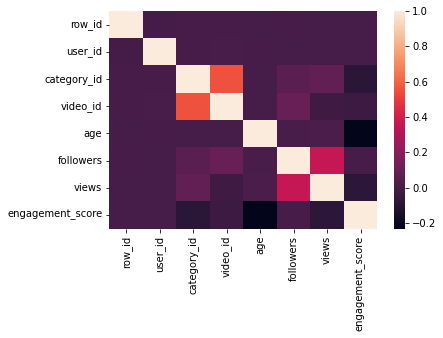

In [264]:
#visualizing the relationship based on correlaion
sns.heatmap(data_train.corr())

In [265]:
#calculating the correlation
data_train.corr()

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score
row_id,1.000000,-0.006953,0.002833,0.000891,-0.005199,-0.001374,-0.001815,-0.003368
user_id,-0.006953,1.000000,0.002139,0.005232,-0.000036,-0.002026,-0.001843,-0.002900
category_id,0.002833,0.002139,1.000000,0.556550,-0.003152,0.056432,0.079321,-0.094288
video_id,0.000891,0.005232,0.556550,1.000000,-0.005615,0.098778,-0.029448,-0.030552
age,-0.005199,-0.000036,-0.003152,-0.005615,1.000000,0.004623,0.011042,-0.232626
followers,-0.001374,-0.002026,0.056432,0.098778,0.004623,1.000000,0.360808,0.000855
views,-0.001815,-0.001843,0.079321,-0.029448,0.011042,0.360808,1.000000,-0.084679
engagement_score,-0.003368,-0.002900,-0.094288,-0.030552,-0.232626,0.000855,-0.084679,1.000000


### Summary:

  1. We see that these variables are not normally distributed.

  2.With these variables I created a model which gave 35% score. So the score can be improved by creating new features.


### Creating new features- Feature Creation

In [266]:
#category wise engagement score
print(data_train.groupby('category_id')['engagement_score'].count())
data_train['avg_category_score'] = data_train['category_id'].map(data_train.groupby('category_id')['engagement_score'].mean().to_dict())
data_test['avg_category_score'] = data_test['category_id'].map(data_train.groupby('category_id')['engagement_score'].mean().to_dict())

category_id
1     1810
2      167
3     1845
4     3678
5     8104
6     1399
7     1885
8     6313
9     1886
10    1217
11    3766
12    3889
13    2777
14     536
15    2164
16    3264
17    1208
18    2241
19    4679
20     702
21    4043
22     366
23    2671
24     524
25    4880
26    1156
27    1103
28    1309
29     916
30     548
31    1855
32    2712
33     517
34    3297
35     986
36    1025
37     962
38     534
39    1339
40     458
41     545
42    2178
43    1019
44     214
45     227
46     236
47      47
Name: engagement_score, dtype: int64


There are 47 categories

In [267]:
#user_id wise engagement score
print(data_train.groupby('user_id')['engagement_score'].count())
data_train['avg_user_score'] = data_train['user_id'].map(data_train.groupby('user_id')['engagement_score'].mean().to_dict())
data_test['avg_user_score'] = data_test['user_id'].map(data_train.groupby('user_id')['engagement_score'].mean().to_dict())

user_id
1        3
2        5
3        4
4        3
5        4
        ..
27730    3
27731    2
27732    2
27733    3
27734    2
Name: engagement_score, Length: 27734, dtype: int64


There are 27734 users

In [268]:
#video_id wise engagement score
print(data_train.groupby('video_id')['engagement_score'].count())
data_train['avg_video_score'] = data_train['video_id'].map(data_train.groupby('video_id')['engagement_score'].mean().to_dict())
data_test['avg_video_score'] = data_test['video_id'].map(data_train.groupby('video_id')['engagement_score'].mean().to_dict())

video_id
1      1282
2       622
3       167
4       932
5       913
       ... 
171      78
172     154
173      80
174      70
175      47
Name: engagement_score, Length: 175, dtype: int64


There are 175 groups

In [269]:
#age wise engagement score
data_train['avg_age_score'] = data_train['age'].map(data_train.groupby('age')['engagement_score'].mean().to_dict())
data_test['avg_age_score'] = data_test['age'].map(data_train.groupby('age')['engagement_score'].mean().to_dict())

In [270]:
#gender wise engagement score
print(data_train.groupby('gender')['engagement_score'].count())
data_train['avg_gender_score'] = data_train['gender'].map(data_train.groupby('gender')['engagement_score'].mean().to_dict())
data_test['avg_gender_score'] = data_test['gender'].map(data_train.groupby('gender')['engagement_score'].mean().to_dict())

gender
Female    36800
Male      52397
Name: engagement_score, dtype: int64


There are 2 groups

In [271]:
#profession wise engagement score
print(data_train.groupby('profession')['engagement_score'].count())
data_train['avg_profession_score'] = data_train['profession'].map(data_train.groupby('profession')['engagement_score'].mean().to_dict())
data_test['avg_profession_score'] = data_test['profession'].map(data_train.groupby('profession')['engagement_score'].mean().to_dict())

profession
Other                   26840
Student                 44638
Working Professional    17719
Name: engagement_score, dtype: int64


There are 3 groups

In [272]:
data_train.head(2)

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score,avg_category_score,avg_user_score,avg_video_score,avg_age_score,avg_gender_score,avg_profession_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33,3.314751,4.673333,3.325765,3.454467,3.783555,3.73797
1,2,5304,32,132,14,Female,Student,330,714,1.79,3.442341,3.080000,3.414046,3.746523,3.066688,3.73797


### Changing categorical variables into numerical

In [273]:
from sklearn.preprocessing import LabelEncoder

#for train data
data_train["Gender"]=pd.get_dummies(data_train["gender"],drop_first=True)
LE=LabelEncoder()
LE.fit(data_train["profession"])
data_train["Profession"]=LE.transform(data_train["profession"])

data_train.drop(columns=['gender','profession'],inplace=True)

#for test data
data_test["Gender"]=pd.get_dummies(data_test["gender"],drop_first=True)
le=LabelEncoder()
le.fit(data_test["profession"])
data_test["Profession"]=le.transform(data_test["profession"])

data_test.drop(columns=['gender','profession'],inplace=True)


In [274]:
data_train['views_per_follower']=data_train['views']/data_train['followers']
data_test['views_per_follower']=data_test['views']/data_test['followers']

In [275]:
data_train.head(5)

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score,avg_category_score,avg_user_score,avg_video_score,avg_age_score,avg_gender_score,avg_profession_score,Gender,Profession,views_per_follower
0,1,19990,37,128,24,180,1000,4.33,3.314751,4.673333,3.325765,3.454467,3.783555,3.737970,1,1,5.555556
1,2,5304,32,132,14,330,714,1.79,3.442341,3.080000,3.414046,3.746523,3.066688,3.737970,0,1,2.163636
2,3,1840,12,24,19,180,138,4.35,3.571666,4.193333,3.478865,3.701378,3.783555,3.737970,1,1,0.766667
3,4,12597,23,112,19,220,613,3.77,3.955189,3.410000,3.877502,3.701378,3.783555,3.737970,1,1,2.786364
4,5,13626,23,112,27,220,613,3.13,3.955189,3.152500,3.877502,3.295289,3.783555,3.096949,1,2,2.786364


In [276]:
#columns of train dataset.
data_train.columns

Index(['row_id', 'user_id', 'category_id', 'video_id', 'age', 'followers',
       'views', 'engagement_score', 'avg_category_score', 'avg_user_score',
       'avg_video_score', 'avg_age_score', 'avg_gender_score',
       'avg_profession_score', 'Gender', 'Profession', 'views_per_follower'],
      dtype='object')

### Model creation and predction

In [277]:
from sklearn.model_selection import train_test_split
#The required variables 
columns=['user_id', 'category_id', 'video_id', 'age', 'followers','views','avg_user_score', 'avg_category_score',
       'avg_video_score', 'avg_age_score', 'avg_gender_score','avg_profession_score', 'Gender',
       'Profession']

# seperating x and y
x=data_train[columns]
y=data_train['engagement_score']
print('x shape:', x.shape)
x_test=data_test[columns]
print('x_test shape:', x_test.shape)

#splitting train data into train and validation
x_train, x_val, y_train, y_val= train_test_split(x,y, test_size=0.2, random_state=46)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

x shape: (89197, 14)
x_test shape: (11121, 14)


((71357, 14), (17840, 14), (71357,), (17840,))

In [278]:
from sklearn.preprocessing import StandardScaler
#standardising the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

In [279]:
#Importing required models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor 
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score

### Linear Regression Model

In [280]:
#building linear model
LR_model=LinearRegression(fit_intercept=True,normalize=False,copy_X=True, n_jobs=None)
LR_model.fit(x_train,y_train)
pred=LR_model.predict(x_val)
print("The score of Linear Regression Model :" , r2_score(y_val,pred))

The score of Linear Regression Model : 0.6793918249000382


### K Neighbors Model

In [281]:
#building a knn model
KNR_model=KNeighborsRegressor()
KNR_model.fit(x_train,y_train)
predKNR=KNR_model.predict(x_val)
print(" The Score of K Neighbors Regressor Model :" ,r2_score(y_val,predKNR)) 

 The Score of K Neighbors Regressor Model : 0.6168380203621942


### Random Forest Model

In [282]:
#building a random forest model
RFR_model=RandomForestRegressor()
RFR_model.fit(x_train,y_train)
predRFR=RFR_model.predict(x_val)
print(" The Score of Random Forest Regressor Model :" ,r2_score(y_val,predRFR)) 

 The Score of Random Forest Regressor Model : 0.6656881081108834


### XGB Regressor Model

In [283]:
# building an xgb model
XGB_model=XGBRegressor()
XGB_model.fit(x_train,y_train)
predXGB=XGB_model.predict(x_val)
print(" The Score of XGB Regressor  Model :" ,r2_score(y_val,predXGB)) 

 The Score of XGB Regressor  Model : 0.6883464058303883


### Gradient Boosting Model

In [284]:
GBR_model=GradientBoostingRegressor()
GBR_model.fit(x_train,y_train)
predGBR=GBR_model.predict(x_val)
print(" The Score of GBR Regressor  Model :" ,r2_score(y_val,predGBR)) 

 The Score of GBR Regressor  Model : 0.6919603588120619


1. By creating new features now the score is better.
2. The score for Linear Regression Model is 89%.
3. The score for Decision Tree Model is 72.6%.
4. The score for K Neighbors Model is 80.6%.
5. The score for Random Forest Model is 85.7%.
6. The score for XGB regressor Model is 88.2%.
7. The score for Gradient Boosting Model is 88.8%.
8. The score for XGBRF regressor Model is 88.2%.

#### Final prediction based on Linear Regression model as it is giving high score

In [286]:
final=LR_model.predict(x_test) 
data_test["engagement_score"]=final  
data_test.head()

,row_id,user_id,category_id,video_id,age,followers,views,avg_category_score,avg_user_score,avg_video_score,avg_age_score,avg_gender_score,avg_profession_score,Gender,Profession,views_per_follower,engagement_score
0,89198,7986,12,42,14,180,138,3.571666,4.195000,3.619694,3.746523,3.783555,3.737970,1,1,0.766667,4.249051
1,89199,11278,34,115,14,230,840,2.792624,4.146000,2.596612,3.746523,3.783555,3.737970,1,1,3.652174,3.634671
2,89200,17245,8,110,44,280,628,3.602425,2.228000,3.684526,3.226303,3.066688,3.096949,0,2,2.242857,2.381208
3,89201,9851,16,137,18,270,462,3.559105,2.836667,3.464688,3.700154,3.783555,3.737970,1,1,1.711111,2.851834
4,89202,16008,34,96,47,230,840,2.792624,2.530000,3.162314,3.034545,3.066688,3.329757,0,0,3.652174,2.476392


In [287]:
code_file=pd.DataFrame().assign(row_id=data_test['row_id'],engagement_score=data_test['engagement_score'])

In [288]:
code_file.to_csv(r'code_fil.csv', index=False)